# Importing libraries

In [36]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, precision_score, f1_score, confusion_matrix

# Read Data

In [20]:
data = pd.read_csv('Social_Network_Ads.csv')
data

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


# Data preprocessing

In [21]:
# cheak if there is a null value
data.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


In [23]:
data = data.drop_duplicates(keep='first')
data.duplicated().sum()

0

In [24]:
data.describe()

,Age,EstimatedSalary,Purchased
count,367.000000,367.000000,367.000000
mean,37.722071,70719.346049,0.376022
std,10.681383,34772.173908,0.485047
min,18.000000,15000.000000,0.000000
25%,29.500000,43000.000000,0.000000
50%,37.000000,71000.000000,0.000000
75%,46.000000,89000.000000,1.000000
max,60.000000,150000.000000,1.000000


<AxesSubplot:>

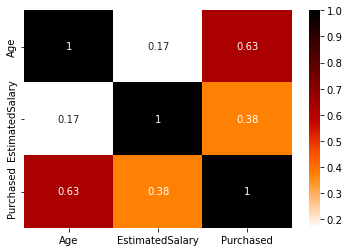

In [25]:
# show the correlation between columns
correlation = data.corr()
sns.heatmap(correlation, cmap="gist_heat_r", annot=True)

* If the value is increasing to 1, it is said to be a positive correlation between two variables. This means that when one variable increases, the other variable also increases

* so you can see that, there is a strong correlation between *Age* and *Purchased*

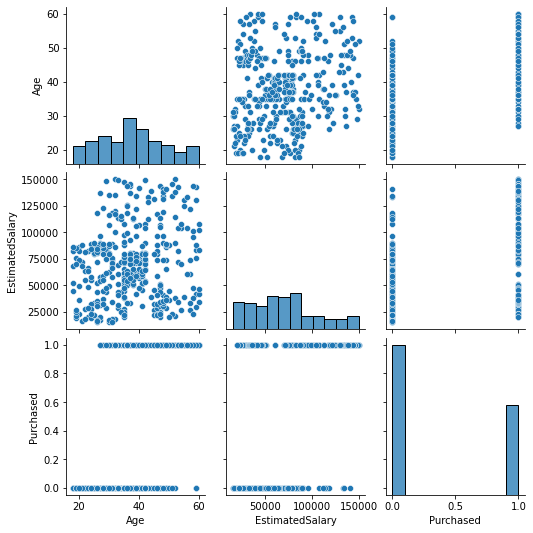

In [26]:
sns.pairplot(data)

In [27]:
# I will separate the Age from the data, with the number of repeated purchasers from the same age
my_dict = dict(data.Age.value_counts())
relation = pd.DataFrame(list(my_dict.items()),  columns=['Ages', 'value_counts'])

In [28]:
relation.head()

,Ages,value_counts
0,35,29
1,37,19
2,47,14
3,42,14
4,26,14


Text(0, 0.5, 'Number of person')

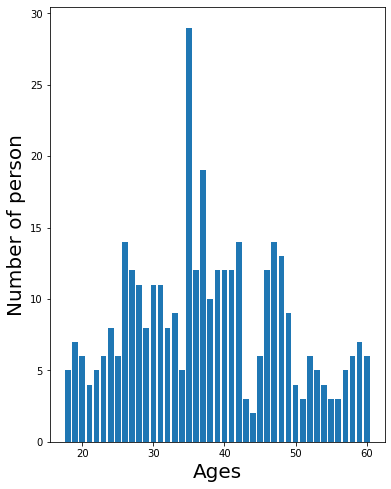

In [12]:
f, ax = plt.subplots(figsize=(6,8))
ax.bar(relation['Ages'], relation['value_counts'], label='Ages')
ax.set_xlabel('Ages', fontsize=20)
ax.set_ylabel('Number of person', fontsize=20)

In [13]:
# function to split Purchased and not Purchased from the data
def purchasers(data):
    not_purchased = data[data['Purchased'].isin([0])].reset_index(drop=True)
    purchased = data[data['Purchased'].isin([1])].reset_index(drop=True)
    return not_purchased, purchased

In [14]:
# call function purchasers
not_purchaser, purchaser = purchasers(data)

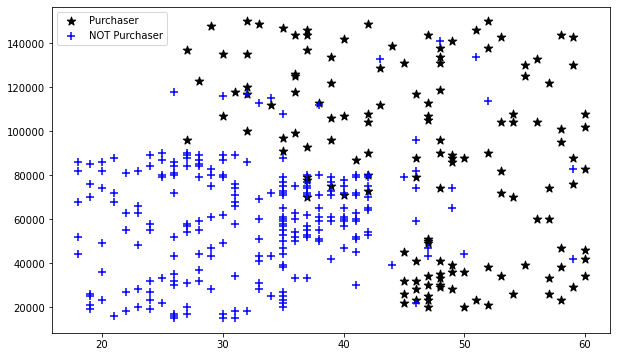

In [15]:
# draw each purchased and not_purchased

f, ax = plt.subplots(figsize=(10, 6))
# draw purchaser first.
ax.scatter(purchaser.Age, purchaser.EstimatedSalary, c='Black', marker='*', label='Purchaser', s=80)
# secondly draw NOT_Purchaser.
ax.scatter(not_purchaser.Age, not_purchaser.EstimatedSalary, c='b', marker='+', label='NOT Purchaser', s=80)
ax.legend()

In [29]:
# splitting each features and target
features = data.iloc[:, :-1].values
target = data.iloc[:, -1].values

In [30]:
target.shape, features.shape

((367,), (367, 2))

# Train Test Splitting

In [89]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((275, 2), (92, 2), (275,), (92,))

### Make standardising data

In [90]:
# make scaling for features
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)


# Evaluate Model


In [91]:
model = LinearSVC()
model = model.fit(x_train, y_train)
y_predict = model.predict(x_test)

In [92]:
y_predict

array([1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0], dtype=int64)

# Accuracy

accuracy_score is -  0.8369565217391305
precision_score is -  0.8620689655172413
f1_score is -  0.7692307692307692


<AxesSubplot:>

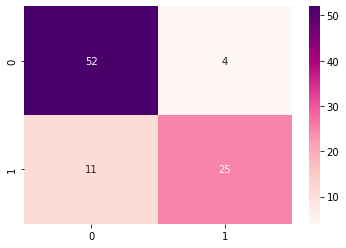

In [106]:
print("accuracy_score is - ",accuracy_score(y_test,y_predict))
print("precision_score is - ",precision_score(y_test,y_predict))
print("f1_score is - ",f1_score(y_test,y_predict))
sns.heatmap(confusion_matrix(y_test,y_predict), annot=True, cmap='RdPu')